In [1]:
%matplotlib inline
import numpy as np 
import scipy as sp 
import matplotlib as mpl 
import matplotlib.cm as cm 
import matplotlib.pyplot as plt
import pandas as pd 
import seaborn as sns 
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [2]:
df = pd.read_csv("Admission_Predict_Ver1.1.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance_of_Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [3]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance_of_Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [4]:
df.shape

(500, 9)

In [5]:
df.rename(columns={ "University Rating": "Rating", "GRE Score": "GRE", "TOEFL Score":"TOEFL", "Chance_of_Admit": "COA"}, inplace=True)
df.head()

,Serial No.,GRE,TOEFL,Rating,SOP,LOR,CGPA,Research,Chance_of_Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [6]:
df['LOGCGPA'] = np.log(df.CGPA+1) # Get Log Transformed CGPA to find Linearity

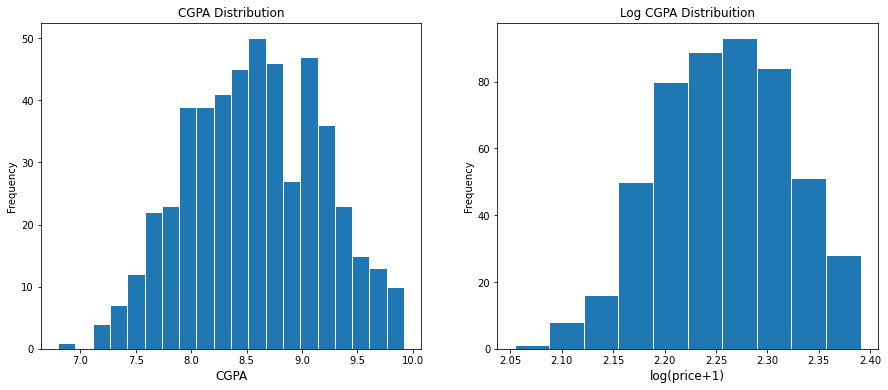

In [7]:
# Plot CGPA Distribution
plt.subplot(1, 2, 1)
(df.CGPA).plot.hist(bins=20,figsize=(15, 6), edgecolor = 'white')
plt.xlabel('CGPA', fontsize=12)
plt.title('CGPA Distribution', fontsize=12)


#_________________________________________________NEXT______________________________________________

#Plot Log CGPA Distribution
plt.subplot(1, 2, 2)
(df.LOGCGPA).plot.hist( figsize=(15,6), edgecolor='white')
plt.xlabel('log(price+1)', fontsize=12)
plt.title('Log CGPA Distribuition', fontsize=12)

plt.show()

<AxesSubplot:xlabel='TOEFL', ylabel='LOGCGPA'>

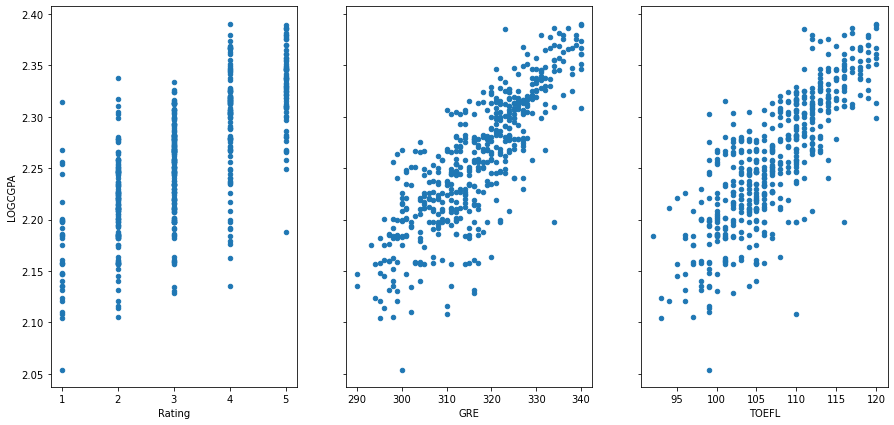

In [8]:
# visualize the relationship between the features and the response using scatterplots
fig, axs = plt.subplots(1, 3, sharey=True)
df.plot(kind='scatter', x='Rating', y='LOGCGPA', ax=axs[0], figsize=(15, 7))
df.plot(kind='scatter', x='GRE', y='LOGCGPA', ax=axs[1])
df.plot(kind='scatter', x='TOEFL', y='LOGCGPA', ax=axs[2])

In [9]:
# Single regression from TOEFL
X = df.TOEFL
X = X.values.reshape((len(X),1))
Y = df.CGPA

In [10]:
# Import Linear Regression Model
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X, Y)

LinearRegression()

In [11]:
# Split data into train/test sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=42)

In [12]:
# Initialize LR Model
lr = LinearRegression()

# Fit the model
lr.fit(X_train, y_train)

# Make predictions
predictions = lr.predict(X_test)

In [13]:
# Store results in variable
r2 = format(r2_score(y_test, predictions),'.3f')
rmse = format(np.sqrt(mean_squared_error(y_test, predictions)),'.3f')
mae = format(mean_absolute_error(y_test, predictions),'.3f')

# Print out result
print("R Squared Score: ", format(r2_score(y_test, predictions),'.3f'))
print("Root Mean Squared Error: ", format(np.sqrt(mean_squared_error(y_test, predictions)),'.3f'))
print("Mean Absolute Error: ", format(mean_absolute_error(y_test, predictions),'.3f'))

R Squared Score:  0.733
Root Mean Squared Error:  0.319
Mean Absolute Error:  0.250


In [14]:
result = pd.DataFrame({'Model':['Single'],'R Squared':[r2], 'RMSE':[rmse], 'MAE':[mae]})
result

,Model,R Squared,RMSE,MAE
0,Single,0.733,0.319,0.250


In [15]:
# Multiple regression
X = df.drop(['CGPA'], axis=1)
Y = df.CGPA

In [16]:
# Split data into train/test sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=42)

In [17]:
# Initialize LR Model
lr = LinearRegression()

# Fit the model
lr.fit(X_train, y_train)

# Make predictions
predictions = lr.predict(X_test)

In [18]:
# Store results in variable
r2 = format(r2_score(y_test, predictions),'.3f')
rmse = format(np.sqrt(mean_squared_error(y_test, predictions)),'.3f')
mae = format(mean_absolute_error(y_test, predictions),'.3f')

# Print out result
print("R Squared Score: ", format(r2_score(y_test, predictions),'.3f'))
print("Root Mean Squared Error: ", format(np.sqrt(mean_squared_error(y_test, predictions)),'.3f'))
print("Mean Absolute Error: ", format(mean_absolute_error(y_test, predictions),'.3f'))

R Squared Score:  0.999
Root Mean Squared Error:  0.021
Mean Absolute Error:  0.016


In [19]:
result_2 = pd.DataFrame({'Model':['Multiple'],'R Squared':[r2], 'RMSE':[rmse], 'MAE':[mae]})
result = result.append(result_2)
result

,Model,R Squared,RMSE,MAE
0,Single,0.733,0.319,0.250
0,Multiple,0.999,0.021,0.016
